In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

def print_metrics(y_true, y_pred, categories):
    print('Accuracy: ' + str(accuracy_score(y_true, y_pred)))
    draw_confusion_matrix(confusion_matrix(y_true, y_pred), categories)

def print_crossval_metrics(ys, categories):
    print('Accuracy: ' + str(np.mean([accuracy_score(y_true, y_pred) for y_true, y_pred in ys])))
    draw_confusion_matrix(sum([confusion_matrix(y_true, y_pred) for y_true, y_pred in ys]), categories)

def draw_confusion_matrix(cm, categories):
    # Draw confusion matrix
    fig = plt.figure(figsize=[3.2*pow(len(categories), 0.5), 2.4*pow(len(categories), 0.5)])
    ax = fig.add_subplot(111)
    cm = cm.astype('float') / np.maximum(cm.sum(axis=1)[:, np.newaxis], np.finfo(np.float64).eps)
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.colormaps['Blues'])
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=categories, yticklabels=categories, ylabel='Annotation', xlabel='Prediction')
    # Loop over data dimensions and create text annotations
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], '.2f'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black", fontsize=int(16-pow(len(categories), 0.5)))
    fig.tight_layout()
    plt.show(fig)

In [3]:
df = pd.read_csv('drug200.csv', delimiter=',')
print('Shape: ', df.shape)
df.head()

Shape:  (200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
print(df['Sex'].value_counts())
print(df['Drug'].value_counts())
print(df['BP'].value_counts())
print(df['Cholesterol'].value_counts())

M    104
F     96
Name: Sex, dtype: int64
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


1    104
0     96
Name: Sex, dtype: int64
0    91
4    54
1    23
3    16
2    16
Name: Drug, dtype: int64
0    77
1    64
2    59
Name: BP, dtype: int64
0    103
1     97
Name: Cholesterol, dtype: int64


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'BP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'Na_to_K'}>,
        <Axes: title={'center': 'Drug'}>]], dtype=object)

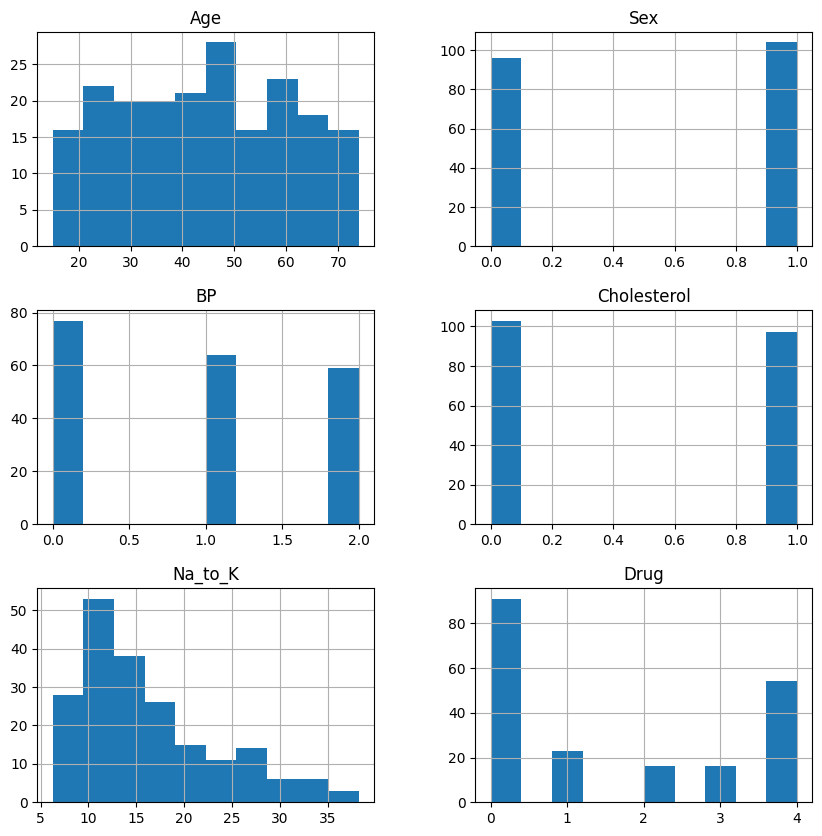

In [5]:
enc = LabelEncoder()
cdf = df
cdf['Drug'] = enc.fit_transform(df['Drug'])
cdf['Cholesterol'] = enc.fit_transform(df['Cholesterol'])
cdf['BP'] = enc.fit_transform(df['BP'])
cdf['Sex'] = enc.fit_transform(df['Sex'])

X = cdf[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = cdf['Drug'].values
categories = list(np.unique(y))

print(df['Sex'].value_counts())
print(df['Drug'].value_counts())
print(df['BP'].value_counts())
print(df['Cholesterol'].value_counts())

cdf.hist(figsize=(10,10))

In [6]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

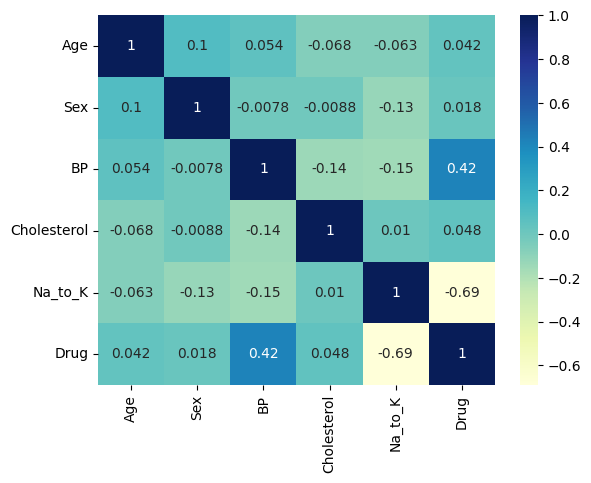

In [7]:
import seaborn as sns
sns.heatmap(cdf.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (150, 5) (150,)
Test set: (50, 5) (50,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# kNN

k_values = list(range(1,25))
acc = []

param_grid={
    'weights':['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute']
}

for k in k_values:
  clf = KNeighborsClassifier(n_neighbors=k)
  grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
  grid.fit(X_train, y_train)

  best_estimator = grid.best_estimator_

  y_pred = best_estimator.predict(X_test)

  acc.append(accuracy_score(y_test, y_pred))


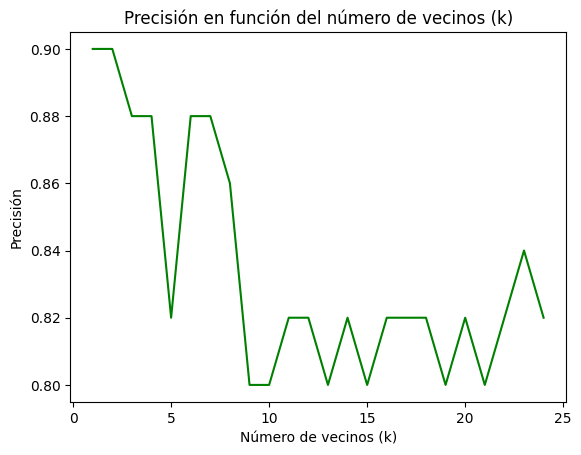

In [10]:
plt.plot(k_values, acc, 'g')
plt.title('Precisión en función del número de vecinos (k)')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión')
plt.show()

Best params:  {'C': 1.0}
Accuracy: 0.88


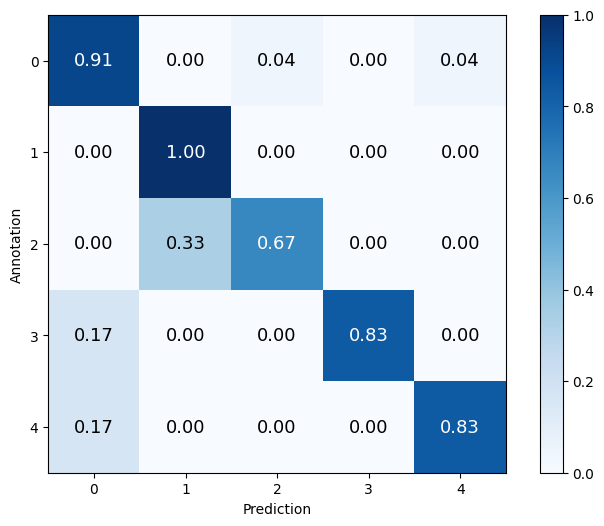

In [11]:
from sklearn.linear_model import LogisticRegression
# logistic regression

param_grid = {
    'C': [0.01, 0.1, 1.0, 2.0]
}

clf = LogisticRegression()
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train,y_train)

best_estimator = grid.best_estimator_

print('Best params: ', grid.best_params_)

y_pred = best_estimator.predict(X_test)

print_metrics(y_test, y_pred, categories)


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

Best params:  {'reg_param': 0.01, 'store_covariance': True}
Accuracy: 0.96


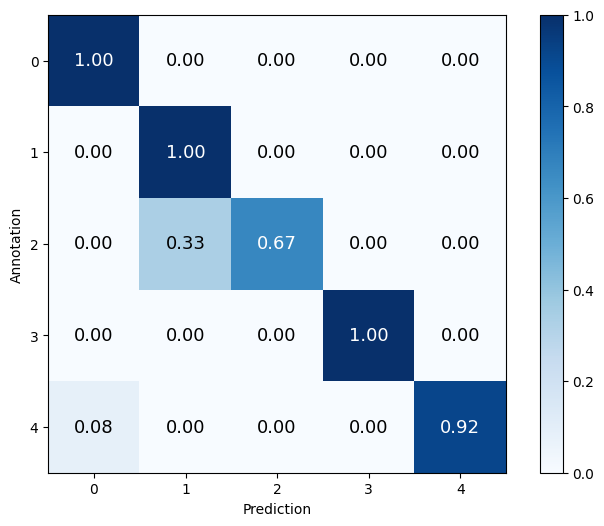

In [16]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# QuadraticDiscriminantAnalysis

param_grid = {
    'reg_param': [0.001, 0.01, 0.1, 1.0],
    'store_covariance': [True, False]
}

clf = QuadraticDiscriminantAnalysis()
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_estimator = grid.best_estimator_

print('Best params: ', grid.best_params_)

y_pred = best_estimator.predict(X_test)

print_metrics(y_test, y_pred, categories)

In [13]:
#Decision Tree

In [14]:
#SVM